# Assignment 3

### This Assignment is due by 11:59 pm EDT February 12. Type your solution in the cells following '# your code is here'. Please, upload your solution to a corresponding Dropbox on LEARN.

###  Problem 1: Resistors

From Electricity and Magnetism 101 course it is known that resistors can be connected in series and in parallel. Suppose we have a resistor with resistance $R_0$ (possibly a system of resistors with the total resistance $R_0$), and would like to connect a new resistor with resistance $R_1$ to it. Then the new resistance $R_n$ of the system will be given by
$$
R_n = R_0 +R_1,
$$
if connection is in series, and
$$
R_n =\frac{R_0 R_1}{R_0 +R_1},
$$
if connection is in parallel.

One can have a system containing  many resistors connected both ways, and it is convenient to have a class that allows us to calculate the resistance of the whole system by adding resistors one by one. Write a simple class named 'Resistor' with only one attribute $r$ representing the value of resistance. Adding a new resistor is achieved by method 'add_res', having external parameter 'in_series' that assumes either True or False depending on how the other resistor is attached (True means that the new resistor is connected in series). This method should also return class Resistor but with new total resistance. 

Do the following (all resistances are in Ohms):
   * Create a resistor with resistance 1 Ohm
   * Create a resistor with resistance 5 Ohm
   * Add them in series and output the new value
   * Add to the system the 3 Ohm rsistor in parallel and output the new value
   * Add to the system the 10 Ohm resistor in series and output the new value
   * Add to the system the 4 Ohm resistor in parallel and output the new value

In [1]:
# your code is here
class Resistor:

    def __init__(self, r):
        self.r = r 
    def prnt(self):
        print(self.r)
    def add_res(self, other, in_series):
        if in_series == True:
            return Resistor(self.r+other.r)
        else:
            return Resistor((self.r*other.r)/(self.r+other.r))

ohm1 = Resistor(1)
ohm5 = Resistor(5)
myresistor = ohm1.add_res(ohm5, True)
myresistor.prnt()
myresistor = myresistor.add_res(Resistor(3),False)
myresistor.prnt()
myresistor = myresistor.add_res(Resistor(10),True)
myresistor.prnt()
myresistor = myresistor.add_res(Resistor(4), False)
myresistor.prnt()

6
2.0
12.0
3.0


### Problem 2: Plotting points and lines

Write a simple "Point" class that will keep the data for a point's location in two dimensions.
Recall how one can plot points and lines using matplotlib.pyplot. Add methods that will:

     * print the location of the point
     * plot a single point
     * plot a line connecting two points 
    
Apply these methods to three points $(1.,1.)$, $(2., 2.)$ and $(0., 1.)$. In other words, produce the plot that has three points and three lines.

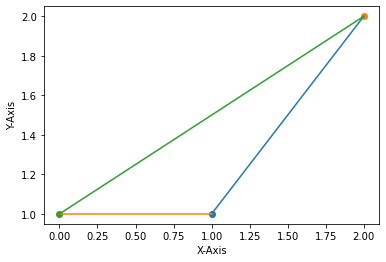

In [4]:
# your code is here
from matplotlib.pyplot import plot, show, ylabel, xlabel, grid, title, scatter
import numpy as np
class Point:
    def __init__(self, x,y):
        self.x = x
        self.y = y
    def prnt(self):
        print("({0},{1})".format(self.x,self.y))

    def plot_point(self):
        scatter(self.x,self.y)
        xlabel("X-Axis")
        ylabel("Y-Axis")
    def plot_line(self,other):
        if other.x == self.x and other.y == self.y:
            self.plot_point()
        else:
            plot([self.x,other.x],[self.y,other.y])
            xlabel("X-Axis")
            ylabel("Y-Axis")

        


test1 = Point(1.,1.)
test2 = Point(2.,2.)
test3 = Point(0.,1.)

test1.plot_point()
test2.plot_point()
test3.plot_point()
test1.plot_line(test2)
test1.plot_line(test3)
test2.plot_line(test3)
show()


###  Problem 3: Vector3D - Inheritance of MyVector

Recall, that we considered class MyVector on one of the lectures (you can find it in the corresponding Jupyter Notebook, than copy and paste). It contains two methods that add and subract vectors in two dimensions. Your task will be to write the class Vector3D(MyVector) that inherits from MyVector. Use super() in the constructor of Vector3D. Vector3D must also have 'add' and 'sub' methods that now add and subtract three-dimensional vectors.  

Define additional Vector3D member functions: mag() which returns the vector magnitude, and cos_theta() which returns the cosine of the angle that the vector makes with the z-axis. 

Do the following:
   * Create a Vector3D object with (x, y, z) equal to (2, 3, 4).  
   * Create the second Vector3D object with (x, y, z) equal to (3, 4, 5). 
   * Output the resulting vector for the vector addition of the two vectors.
   * Output the subtraction of the first vector from the second one. 
   * Output the magnitude of the first vector.
   * Output the cos_theta of the second vector.

In [7]:
# your code is here
import math as mt
class MyVector:
    def __init__(self, x, y):
        self.x, self.y = x, y
        self.vec = (self.x, self.y) # another attribute in the form of a tupple
        # built-in constructor always returns None
                  
    def add(self, other): # adds another vector to the current one
        
        return MyVector(self.x + other.x, self.y + other.y) 
       # returns an object of the same class!!! 
    
    def sub(self, other): # subtracts another vector from the current one
                         # both belong to the same class
            
        return MyVector(self.x - other.x, self.y - other.y) 

class Vector3D(MyVector):
    def __init__(self, x ,y, z):
        super().__init__(x,y)
        self.z = z

    def prnt(self):
        print('({0},{1},{2})'.format(self.x,self.y,self.z))

    def add(self, other):
        return Vector3D(self.x+other.x,self.y+other.y,self.z+other.z)

    def sub(self, other):
        return Vector3D(self.x-other.x,self.y-other.y,self.z-other.z)

    def mag(self):
        return mt.sqrt(self.x**2+self.y**2+self.z**2)

    def cos_theta(self):
        return self.z/self.mag()

vector1 = Vector3D(2,3,4)
vector2 = Vector3D(3,4,5)
vector1.add(vector2).prnt()
vector2.sub(vector1).prnt()
print(vector1.mag())
print(vector2.cos_theta())


(5,7,9)
(1,1,1)
5.385164807134504
0.7071067811865475
